In [1]:
include("./src/gnuplot.jl");
include("./src/voronoi.jl");

  0.133209 seconds (79.02 k allocations: 3.959 MiB)


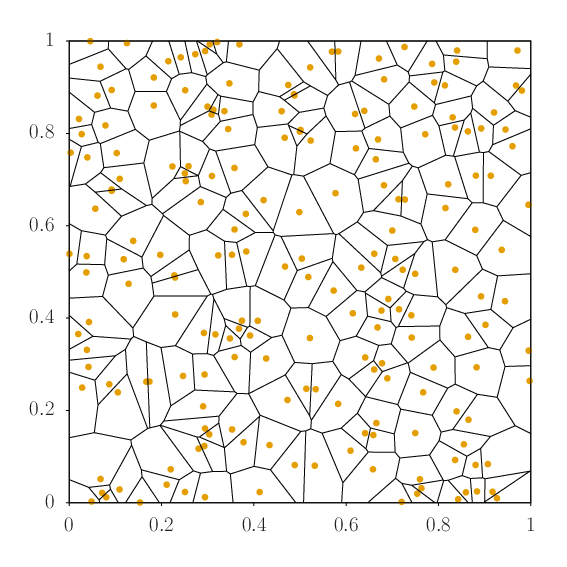

In [2]:
function test()
    sites = [Point(rand(),rand()) for i = 1:200]
    @time edges = getVoronoiDiagram(sites)

    gp = gnuplot(20,20)
    println(gp, "unset key; set xrange [0:1]; set yrange [0:1];
        set tics out nomirror; set size ratio -1;
        plot '-' w p pt 7 ps 2 lt 2, '-' w l lt 1")
    for site in sites
        px = site.x
        py = site.y
        println(gp, "$px $py")
    end
    println(gp,"e")

    for e in edges
        px = e.start.x
        py = e.start.y
        qx = e.finish.x
        qy = e.finish.y
        println(gp, "$px $py")
        println(gp, "$qx $qy\n")
    end
    plot(gp)
end
test()